In [2]:
%pylab inline
import pandas as pd
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


# Téléchargement du fichier CSV dans la mémoire

In [3]:
data = pd.read_csv('Documents/Uber/uber-raw-data-apr14.csv')

In [10]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# Convertir à DateTime pour mieux travailler avec les dates

In [12]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [14]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


# Convertir le jour du month, le jour de la semaine et l'heure et les ajouter comme colonnes

In [15]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [24]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

In [20]:
def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

# Analyse

## Analyser le jour du mois (dom)

Text(0.5, 1.0, 'Frequence par jour du mois chez Uber - Avril')

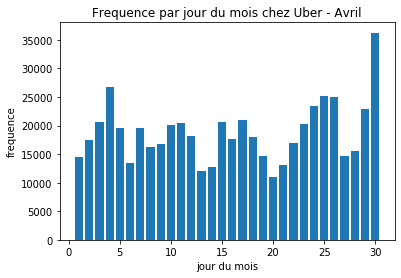

In [35]:
# C'est interessant de mettre les bins à 30 pour les 30 jours du mois
# Le range, c'est où les bins commencent et terminent
hist(data.dom, bins = 30, rwidth = .8, range = (0.5, 30.5))
xlabel('jour du mois')
ylabel('frequence')
title('Frequence par jour du mois chez Uber - Avril')

In [38]:
# Pour chaque jour, il va grouper toutes les heures de passage
#for k, rows in data.groupby('dom'):
#    print(k, len(rows))
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

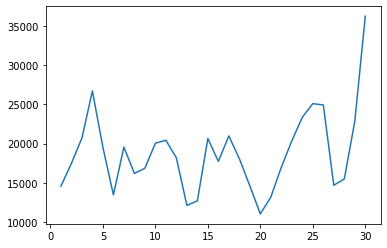

In [40]:
# Plot chaque drive par jour pour le mois d'avril
plot(by_date)

<BarContainer object of 30 artists>

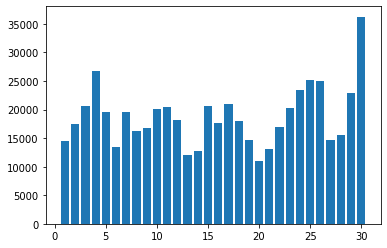

In [41]:
# Un histogram pour chaque drive par jour pour le mois d'avril
bar(range(1, 31), by_date)

In [44]:
# L'organisation est fait par rapport aux valeurs et pas par rapport aux heures et dates
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

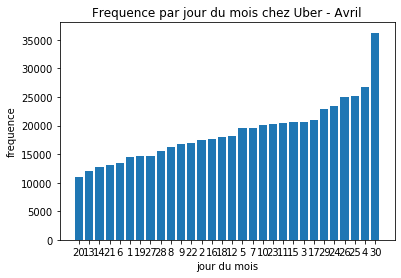

In [51]:
# Un histogram pour chaque drive par jour pour le mois d'avril, organisé par valeurs, nous utilisons xticks pour les valeurs de x (les jours dans ce cas)
# Use a ; to delete the output text
bar(range(1, 31), by_date_sorted)
xticks(range(1, 31), by_date_sorted.index)
xlabel('jour du mois')
ylabel('frequence')
title('Frequence par jour du mois chez Uber - Avril')
;

## Analysis par heure

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

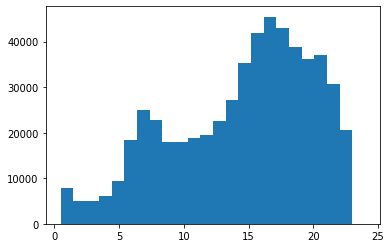

In [52]:
# Un histogramme pour les heures, bins pour les 24 heures
hist(data.hour, bins = 24, range = (0.5, 24))

## Analyse par jour de la semaine

([<matplotlib.axis.XTick at 0x1a2ae7d750>,
 <a list of 7 Text xticklabel objects>)

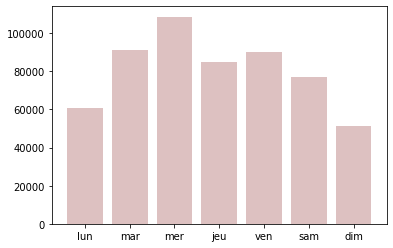

In [59]:
hist(data.weekday, bins = 7, range = (-0.5,6.5), rwidth = 0.8, color='#AA6666', alpha=0.4)
xticks(range(7), 'lun mar mer jeu ven sam dim'.split())

# Cross Analysis (Heure et Jour de la Semaine)

In [63]:
# Grouper par heure et jour de la semaine et compter les observations avec la méthode que nous avons créé ci-dessus
# Unstack a créé la jolie table
data.groupby('hour weekday'.split()).apply(count_rows).unstack()

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


In [67]:
# À l'inverse du tableau ci-dessus
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

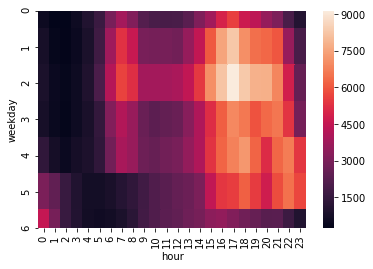

In [68]:
# En utilisant Seaborn
sb.heatmap(by_cross)

# Analyse par Latitude et Longitude

''

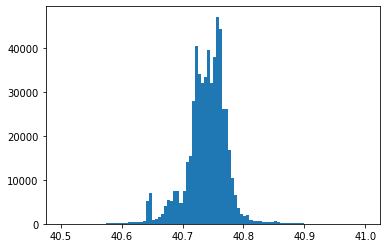

In [71]:
# C'est de commencer avec un histogramme sans les bins si on ne le connait pas, ensuite les ajouter, et ensuite faire
# espèce de zoom sur la partie que nous intéresse avec range
hist(data.Lat, bins = 100, range = (40.5, 41))
;

''

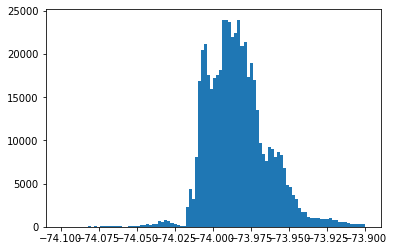

In [73]:
# Le histogramme pour la longitude
hist(data.Lon, bins = 100, range = (-74.1, -73.9))
;

''

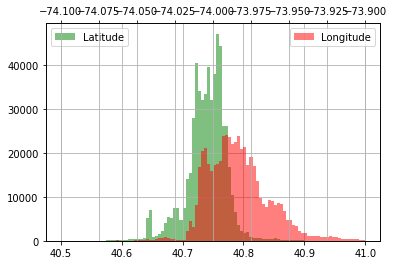

In [80]:
# Un histogramme avec la Latitude et la Longitude
# Utiliser Twiny puisque un plot et dans les positives et l'autre dans les négatives
# On ajoute les grids
# Chaque label est lié à la legende du graphique
hist(data.Lat, bins = 100, range = (40.5, 41), color = 'g', alpha = 0.5, label = 'Latitude')
grid()
legend(loc='upper left')
twiny()
hist(data.Lon, bins = 100, range = (-74.1, -73.9), color = 'r', alpha = 0.5, label = 'Longitude')
grid()
legend(loc='best')
legend()
;

(0, 100)

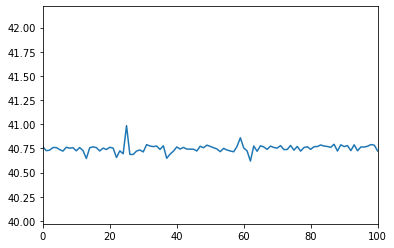

In [81]:
# Plot la Latitude avec une ligne
# Le xlim pour bien voir la ligne
plot(data.Lat)
xlim(0, 100)

(0, 100)

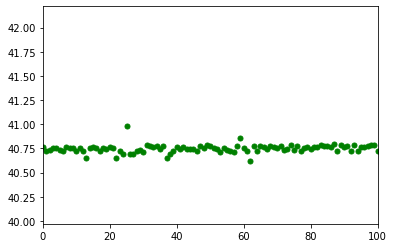

In [86]:
# Je peux également utiliser de points ou * ou ^
# ms pour la taille
plot(data.Lat, '.', ms = 10, color = 'green', label = 'Latitude')
xlim(0, 100)

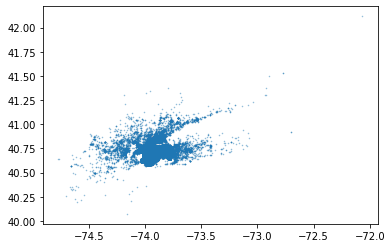

In [90]:
# Nous pouvons également utilise X et Y pour la latitude et la longitude avec de points
plot(data.Lon, data.Lat, '.', ms = 1, alpha = 0.5)

(40.7, 41)

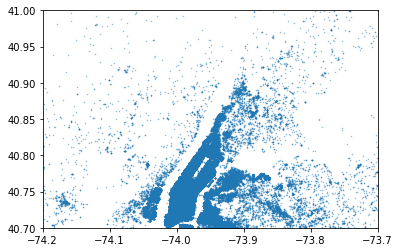

In [92]:
# Nous allons faire un zoom avec xlim et ylim
plot(data.Lon, data.Lat, '.', ms = 1, alpha = 0.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)

(40.7, 41)

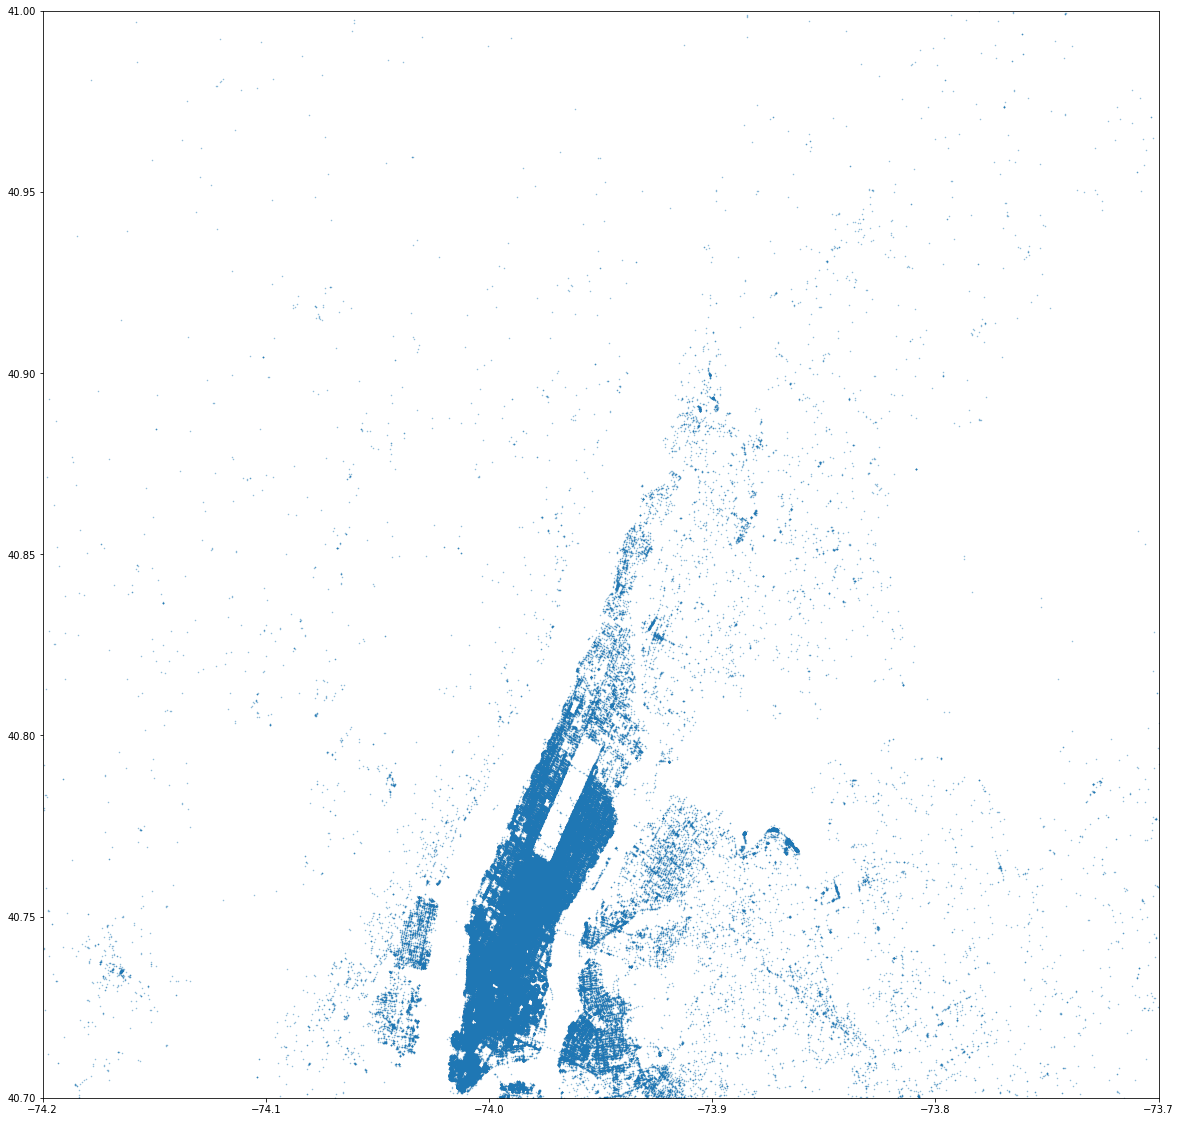

In [94]:
# Nous allons changer la taile du plot
# Dans ce plot, grâce aux longitudes et latitudes, nous pouvons reconnaitre Manhatan
figure(figsize=(20,20))
plot(data.Lon, data.Lat, '.', ms = 1, alpha = 0.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)